# 二値分類
5とそれ以外に分類

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas

データ読み込み

- x_trainとy_trainは、訓練データ。x_textとy_testは試験データ
- labelは整数に変換しておく

In [11]:
mnist = fetch_openml('mnist_784', version=1)
x_train, x_test = mnist['data'].iloc[:60000], mnist['data'].iloc[60000:]
y_train, y_test = mnist['target'].iloc[:60000], mnist['target'].iloc[60000:]
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

訓練と予想

In [18]:
y_train5 = (y_train == 5)
sgd_clf = SGDClassifier(random_state=48) #確率的最急降下法
sgd_clf.fit(x_train,y_train5) #訓練
predict:list[bool] = sgd_clf.predict(x_test) #type:ignore

In [19]:
def findErrors(y:pandas.DataFrame,pre:list[bool]) -> dict[int,int]:
    """
    データが正しく分類できるかを判定
    """
    output = dict()
    for i in range(len(pre)):
        f = False
        if y.iloc[i] == 5 and not pre[i]:
            f = True
        if y.iloc[i] != 5 and pre[i]:
            f = True
        if f:
            output[i] = y.iloc[i]
    return output


データの正解率

In [20]:
def errorRatio(errors:dict[int,int],pre:list[bool])->tuple[float,float]:
    """
    正解率を評価する

    parameters
    ----
    y: テスト用ラベル

    return
    ----
    "5"を"5"以外と判定した割合、"5"以外を"5"と判定した割合
    """
    n = len(pre)
    fn = 0
    fp = 0
    for i in errors.keys():     
        if errors[i] ==5:   
            fn += 1
        if errors[i] != 5:
            fp += 1
    return fn / n, fp / n 


In [21]:
def showResult(input:dict[int,int], d:pandas.DataFrame,w = 10, maxNum = 0, filename=''):
    """
    判定結果を図示
    """
    if maxNum == 0:
        maxNum = len(input) 
    n = int(maxNum / w) + 1
    m = min(n, w)
    fig, ax = plt.subplots(n, m, figsize=(10, 10))
    s = 0
    for k in input.keys():
        y = int(s/w)
        x = s % w
        digit = d.iloc[k]
        image = digit.values.reshape(28,28)
        if n > 1:
            ax[y][x].imshow(image, cmap='binary')
        else:
            ax[x].imshow(image, cmap='binary')
        s += 1
        if s >= maxNum:
            break
    if n == 1:
        for a in ax:
            a.axis('off')
    else:
        for a in ax:
            for aa in a:
                aa.axis('off')
    if len(filename)>0:
        plt.savefig(filename)
    plt.show()

5をそれ以外と判定した割合:0.0158
5以外を5と判定した割合:0.0182


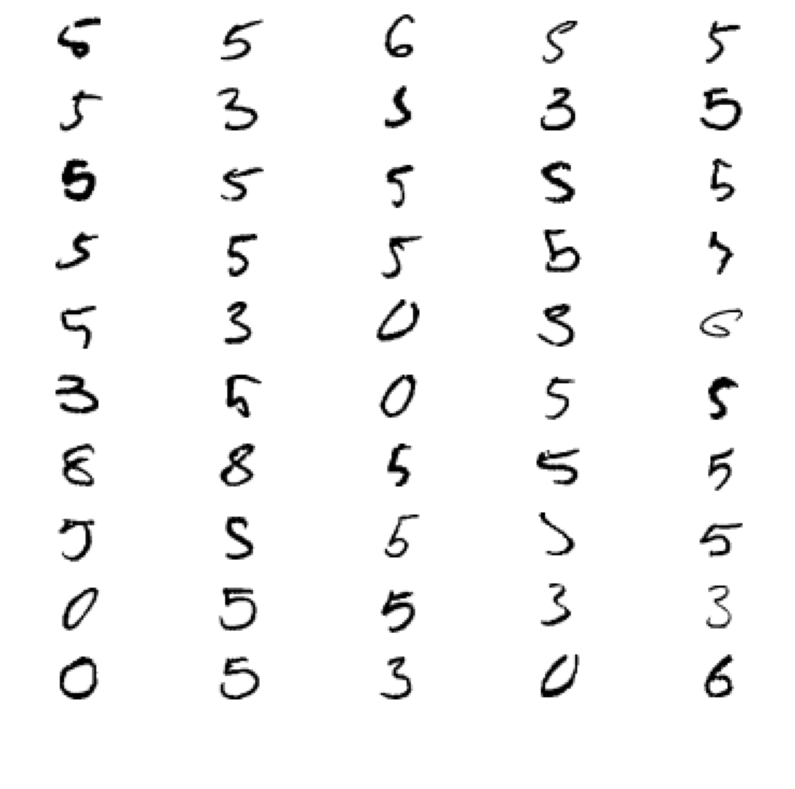

In [22]:
errors = findErrors(y_test,predict)
fn, fp = errorRatio(errors,predict)
print(f'5をそれ以外と判定した割合:{fn}')
print(f'5以外を5と判定した割合:{fp}')
showResult(errors, x_test, w = 5, maxNum = 50, filename='errors.pdf')